In [44]:
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract

import threading
import time

class IBapi(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self, self)
        self.data = [] #Initialize variable to store candle

    def historicalData(self, reqId, bar):
        # print(f'Time: {bar.date} Close: {bar.close}')
        self.data.append([bar.date, bar.open])
        #print(bar)


def GetStock(contract, duration="30 D",granularity="1 hour"):
    app = IBapi()
    app.connect('127.0.0.1', 7496, 123)
    def run_loop():
        app.run()
    #Start the socket in a thread
    api_thread = threading.Thread(target=run_loop, daemon=True)
    api_thread.start()

    time.sleep(1) #Sleep interval to allow time for connection to server



    #Request historical candles
    app.reqHistoricalData(1, contract, '', duration, granularity, 'MIDPOINT', 1, 2, False, [])

    time.sleep(5) #sleep to allow enough time for data to be returned

    #Working with Pandas DataFrames
    import pandas

    df = pandas.DataFrame(app.data, columns=['DateTime', 'Open'])
    df['DateTime'] = pandas.to_datetime(df['DateTime'],unit='s')

    #df['DateTime'] = pandas.to_datetime(df['DateTime'],format='%Y%m%d')
    #df.to_csv('EURU_Hourly.csv')  

    app.disconnect()
    return df.set_index("DateTime")#.rename(columns={"Open":"open"})


In [65]:
import pandas as pd
import scipy.stats
df = None
#Create contract object
contract = Contract()
contract.symbol = 'MES'
contract.secType = 'FUT'
contract.exchange = 'GLOBEX'
contract.lastTradeDateOrContractMonth  = '202009'

df = GetStock(contract, duration="9 M",granularity="1 hour")
  

ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:usfuture
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:usopt
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:euhmds
ERROR -1 2106 HMDS data farm connection is OK:ushmds.nj
ERROR -1 2106 HMDS data farm connection is OK:fundfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefnj


In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

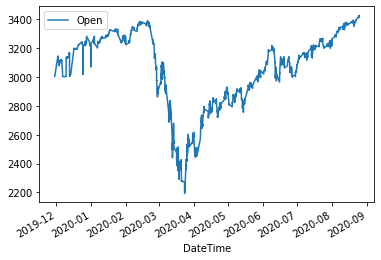

In [68]:
df.plot()

In [172]:
import itertools
list(itertools.product([1,2,3],[2,3,4]))

[(1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 2), (3, 3), (3, 4)]

In [245]:
np.arange(10,100,10)

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [246]:
slows = np.arange(10,100,10)

fasts = np.arange(100,240,10)
samples = 300
ss = []
for slow,fast in itertools.product(slows,fasts):
    sharpes= []
    for i in range(samples):
        in_n =10
        df_ = df[np.random.randint(0,in_n,df.shape[0]) != 0]
        sma1 = df_.rolling(int(slow/(1-1.0/in_n))).mean()
        sma2 = df_.rolling(int(fast/(1-1.0/in_n))).mean()
        signal = 1*(sma1>sma2)
        returns = np.log(1+df.pct_change().shift(-1)).dropna()
        strategy_returns = (returns*(signal)).dropna()
        sharpe = lambda df : (252**0.5)*(df.mean()/df.std())
        sharpes.append(sharpe(strategy_returns)["Open"])
    sharpes = np.array(sharpes)
    #plt.hist(sharpes, bins=100);
    ss.append(sharpes.mean())

In [247]:
np.array([ str(s)+ " " + str(f) for s,f in list(itertools.product(slows,fasts))]).reshape(len(slows),len(fasts))

array([['10 100', '10 110', '10 120', '10 130', '10 140', '10 150',
        '10 160', '10 170', '10 180', '10 190', '10 200', '10 210',
        '10 220', '10 230'],
       ['20 100', '20 110', '20 120', '20 130', '20 140', '20 150',
        '20 160', '20 170', '20 180', '20 190', '20 200', '20 210',
        '20 220', '20 230'],
       ['30 100', '30 110', '30 120', '30 130', '30 140', '30 150',
        '30 160', '30 170', '30 180', '30 190', '30 200', '30 210',
        '30 220', '30 230'],
       ['40 100', '40 110', '40 120', '40 130', '40 140', '40 150',
        '40 160', '40 170', '40 180', '40 190', '40 200', '40 210',
        '40 220', '40 230'],
       ['50 100', '50 110', '50 120', '50 130', '50 140', '50 150',
        '50 160', '50 170', '50 180', '50 190', '50 200', '50 210',
        '50 220', '50 230'],
       ['60 100', '60 110', '60 120', '60 130', '60 140', '60 150',
        '60 160', '60 170', '60 180', '60 190', '60 200', '60 210',
        '60 220', '60 230'],
       ['7

In [259]:
ss_ = np.array(ss).reshape(len(slows),len(fasts))
list(itertools.product(slows,fasts))[np.argmax(ss_.flatten())]

(50, 120)

In [261]:
120*4

480

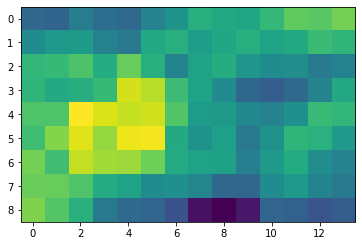

In [249]:
plt.imshow(ss_)

Open    0.402896
dtype: float64

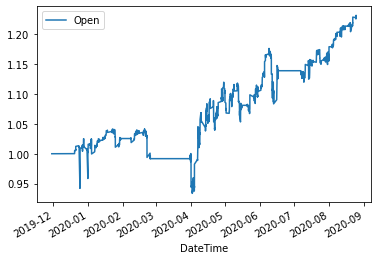

In [256]:
sma1 = df.rolling(50).mean()
sma2 = df.rolling(120).mean()
signal = 1*(sma1>sma2)
returns = np.log(1+df.pct_change().shift(-1)).dropna()
strategy_returns = (returns*(signal)).dropna()
np.exp(strategy_returns.cumsum(0)).plot()
sharpe(strategy_returns)

In [251]:
r_ = returns[signal>0].dropna()
scipy.stats.skew(r_),scipy.stats.kurtosis(r_)

(array([-0.08320629]), array([32.40914264]))

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   2.,   1.,   0.,   1.,   2.,   0.,   0.,   2.,   2.,   3.,
          4.,   9.,   3.,  16.,  24.,  24.,  25.,  33.,  62.,  76., 113.,
        168., 251., 311., 407., 351., 231., 166., 111.,  79.,  40.,  25.,
         16.,  17.,   7.,   8.,   9.,   6.,   1.,   1.,   2.,   0.,   1.,
          1.,   1.,   0.,   0.,   1.,   2.,   1.,   2.,   1.,   1.,   1.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          1.]),
 array([-2.36617293e-02, -2.31603626e-02, -2.26589958e-02, -2.21576291e-02,
        -2.16562624e-02, -2.11548957e-02, -2.06535290e-02, -2.01521622e-02,
        -1.96507955e-02, -1.91494288e-02, -1.86480621e-02, -1.81466954e-02,
        -1.76453286e-02, -1.71439619e-02, -1.66425952e-02, -1.61412285e-02,
        -1.563

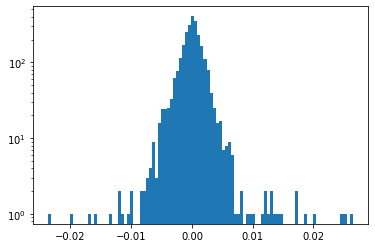

In [41]:
plt.hist(r_.values.flatten(),bins=100, log=True)

In [208]:
returns = np.log(1+df.pct_change().shift(-1)).dropna()

samples = []
for w1 in [1,4,8,16,24]: # np.random.randint(0,200,50):
    for w2 in [15,30,60,120]: #np.random.randint(0,200,50):
        sma1 = df.rolling(w1).mean()
        sma2 = df.rolling(w2).mean()
        signal = 1*(sma1>sma2)
        strategy_returns = (returns*(signal)).dropna()
        sharpe = lambda df : (252**0.5)*(df.mean()/df.std())
        sr = sharpe(strategy_returns.mean(1))
        samples.append([w1,w2,sr])
        print(w1,w2,sr)

1 15 0.4056599980103164
1 30 0.5387643575052086
1 60 0.2986125404402119
1 120 0.2844189812317161
4 15 0.5343738498087321
4 30 0.5424284148585676
4 60 0.31604512524790707
4 120 0.29524572614672984
8 15 0.2730032971724587
8 30 0.2185304862245886
8 60 0.2664766486968724
8 120 0.33496092798470745
16 15 -0.16115606997755946
16 30 0.3060055589677057
16 60 0.06089203778025449
16 120 0.3416150642903832
24 15 -0.2605416875016586
24 30 0.01649408966333939
24 60 0.0960690868772984
24 120 0.3794746500057234


In [204]:
runs = np.nan_to_num(np.array(samples))